# Determing CpG ratio per Gene Function

# Step 1: Obtain GO slim information (gene function)

In [17]:
!head ../data/Piura_v1_GOslim.csv

# Step 2: Determine CpG ratio for each gene 

# Step 2a: Convert fasta to tab-delimited

In [18]:
!perl -e '$count=0; $len=0; while(<>) {s/\r?\n//; s/\t/ /g; if (s/^>//) { if ($. != 1) {print "\n"} s/ |$/\t/; $count++; $_ .= "\t";} else {s/ //g; $len += length($_)} print $_;} print "\n"; warn "\nConverted $count FASTA records in $. lines to tabular format\nTotal sequence length: $len\n\n";' \
../data/Piura_v1_contigs.fa > ../data/Piura_v1_contigs.tab


Converted 15022 FASTA records in 384556 lines to tabular format
Total sequence length: 21729367



In [19]:
!head -1 ../data/Piura_v1_contigs.tab

PiuraChilensis_v1_contig_1		ATTTACAATACGAAGTAAAATAGATAACGTGAAAATAATCTTGGTGCTGGATGATCGATCAAGTTCACCAATATTTTATTGTAAAAAATCATTCTAAACAGCATGAAATCGTGTACAATGTATAAACAAGCAAATATATAACACTAAAGCAAGAGGGCGTAAGTGGGGGGGTGGGTGAGAGTAAAAAATTCAAACATGTCAAATACCCCGGCGTTAGCCTTAAAAGCACCATGGACTTCTGCCTTCAATAAGCATAAAATTAAAACACCTAATACACAATGAATATACAGATAAAACAGATTTATGAATAGTTGGTGTTACATCTTTTACAGCCATAAGCCTTCATTTTGCTTCCAAACGTATAAAATCTGACTTGGAACAATATACAGCCATGAGATATGACACAGCGAGCACTACAATATATATTTATCTTGTACTATACAGCCTGTACAAGAAAATTCTGGAATTGTCTTCACAAGAGACAGAAAAATAGTTGCAATGTGAATGCTAGTCTACTATTTGATCACAATTGGATAGAAAAGTACAGCACATAAATGTTGGTGATACCTTAAAGAAAAGTGCAACAATATCAAAGGAATTAGTACCAGCATGCATTAGAAAAGTAAAAGTCTTGCTTATTACACAAAGCTGACTATATGATGTTCACCGCTTCTGGTGTGCAAAGAATTAAAAACAATGCAATTTCGGTCAGTTTTAACAAGGAATTAACAATTCATAGGAAAAATACAAGCATATGGTCTCAGGCCAATTGCTAGGACATAAAAAAAGCCTGCATATCACGAAAAGCCAAGTGCATGCATCGTATCCTGAAGACACCTTGATATTAACATGTAAGAAATTTAGCTTGCCACATTTCCATATTCCATAATTTCATTTTGAACACCGTGCCAGCAAATTCATCTGATATAAACACACAGGCAACTAATTTGGACACTTTCTAACTAGGTAGTT

In [20]:
#temp replace name so c or g will not confound
!sed 's/PiuraChilensis_v1_contig/999999/g' <../data/Piura_v1_contigs.tab> ../data/Piura_v1-99_contigs.tab


In [22]:
!head -1 ../data/Piura_v1-99_contigs.tab

999999_1		ATTTACAATACGAAGTAAAATAGATAACGTGAAAATAATCTTGGTGCTGGATGATCGATCAAGTTCACCAATATTTTATTGTAAAAAATCATTCTAAACAGCATGAAATCGTGTACAATGTATAAACAAGCAAATATATAACACTAAAGCAAGAGGGCGTAAGTGGGGGGGTGGGTGAGAGTAAAAAATTCAAACATGTCAAATACCCCGGCGTTAGCCTTAAAAGCACCATGGACTTCTGCCTTCAATAAGCATAAAATTAAAACACCTAATACACAATGAATATACAGATAAAACAGATTTATGAATAGTTGGTGTTACATCTTTTACAGCCATAAGCCTTCATTTTGCTTCCAAACGTATAAAATCTGACTTGGAACAATATACAGCCATGAGATATGACACAGCGAGCACTACAATATATATTTATCTTGTACTATACAGCCTGTACAAGAAAATTCTGGAATTGTCTTCACAAGAGACAGAAAAATAGTTGCAATGTGAATGCTAGTCTACTATTTGATCACAATTGGATAGAAAAGTACAGCACATAAATGTTGGTGATACCTTAAAGAAAAGTGCAACAATATCAAAGGAATTAGTACCAGCATGCATTAGAAAAGTAAAAGTCTTGCTTATTACACAAAGCTGACTATATGATGTTCACCGCTTCTGGTGTGCAAAGAATTAAAAACAATGCAATTTCGGTCAGTTTTAACAAGGAATTAACAATTCATAGGAAAAATACAAGCATATGGTCTCAGGCCAATTGCTAGGACATAAAAAAAGCCTGCATATCACGAAAAGCCAAGTGCATGCATCGTATCCTGAAGACACCTTGATATTAACATGTAAGAAATTTAGCTTGCCACATTTCCATATTCCATAATTTCATTTTGAACACCGTGCCAGCAAATTCATCTGATATAAACACACAGGCAACTAATTTGGACACTTTCTAACTAGGTAGTTCAGAAAATACAGCTTTCA

In [23]:
#add column with length of sequence
!perl -e '$col = 2;' -e 'while (<>) { s/\r?\n//; @F = split /\t/, $_; $len = length($F[$col]); print "$_\t$len\n" } warn "\nAdded column with length of column $col for $. lines.\n\n";' \
../data/Piura_v1-99_contigs.tab > ../data/Piura_v1-99-l_contigs.tab


Added column with length of column 2 for 15022 lines.



In [24]:
!head -1 ../data/Piura_v1-99-l_contigs.tab

999999_1		ATTTACAATACGAAGTAAAATAGATAACGTGAAAATAATCTTGGTGCTGGATGATCGATCAAGTTCACCAATATTTTATTGTAAAAAATCATTCTAAACAGCATGAAATCGTGTACAATGTATAAACAAGCAAATATATAACACTAAAGCAAGAGGGCGTAAGTGGGGGGGTGGGTGAGAGTAAAAAATTCAAACATGTCAAATACCCCGGCGTTAGCCTTAAAAGCACCATGGACTTCTGCCTTCAATAAGCATAAAATTAAAACACCTAATACACAATGAATATACAGATAAAACAGATTTATGAATAGTTGGTGTTACATCTTTTACAGCCATAAGCCTTCATTTTGCTTCCAAACGTATAAAATCTGACTTGGAACAATATACAGCCATGAGATATGACACAGCGAGCACTACAATATATATTTATCTTGTACTATACAGCCTGTACAAGAAAATTCTGGAATTGTCTTCACAAGAGACAGAAAAATAGTTGCAATGTGAATGCTAGTCTACTATTTGATCACAATTGGATAGAAAAGTACAGCACATAAATGTTGGTGATACCTTAAAGAAAAGTGCAACAATATCAAAGGAATTAGTACCAGCATGCATTAGAAAAGTAAAAGTCTTGCTTATTACACAAAGCTGACTATATGATGTTCACCGCTTCTGGTGTGCAAAGAATTAAAAACAATGCAATTTCGGTCAGTTTTAACAAGGAATTAACAATTCATAGGAAAAATACAAGCATATGGTCTCAGGCCAATTGCTAGGACATAAAAAAAGCCTGCATATCACGAAAAGCCAAGTGCATGCATCGTATCCTGAAGACACCTTGATATTAACATGTAAGAAATTTAGCTTGCCACATTTCCATATTCCATAATTTCATTTTGAACACCGTGCCAGCAAATTCATCTGATATAAACACACAGGCAACTAATTTGGACACTTTCTAACTAGGTAGTTCAGAAAATACAGCTTTCA

In [25]:
!awk -F\CG '{print NF-1}' ../data/Piura_v1-99-l_contigs.tab > ../data/Piura_v1-99-l_contigs__CG.tab
!awk -F\C '{print NF-1}' ../data/Piura_v1-99-l_contigs.tab > ../data/Piura_v1-99-l_contigs__C.tab
!awk -F\G '{print NF-1}' ../data/Piura_v1-99-l_contigs.tab > ../data/Piura_v1-99-l_contigs__G.tab
!paste ../data/Piura_v1-99-l_contigs.tab \
../data/Piura_v1-99-l_contigs__CG.tab \
../data/Piura_v1-99-l_contigs__C.tab \
../data/Piura_v1-99-l_contigs__G.tab \
> ../data/Piura_v1-99-l_contigs__C-G.tab
!head -1 ../data/Piura_v1-99-l_contigs__C-G.tab


999999_1		ATTTACAATACGAAGTAAAATAGATAACGTGAAAATAATCTTGGTGCTGGATGATCGATCAAGTTCACCAATATTTTATTGTAAAAAATCATTCTAAACAGCATGAAATCGTGTACAATGTATAAACAAGCAAATATATAACACTAAAGCAAGAGGGCGTAAGTGGGGGGGTGGGTGAGAGTAAAAAATTCAAACATGTCAAATACCCCGGCGTTAGCCTTAAAAGCACCATGGACTTCTGCCTTCAATAAGCATAAAATTAAAACACCTAATACACAATGAATATACAGATAAAACAGATTTATGAATAGTTGGTGTTACATCTTTTACAGCCATAAGCCTTCATTTTGCTTCCAAACGTATAAAATCTGACTTGGAACAATATACAGCCATGAGATATGACACAGCGAGCACTACAATATATATTTATCTTGTACTATACAGCCTGTACAAGAAAATTCTGGAATTGTCTTCACAAGAGACAGAAAAATAGTTGCAATGTGAATGCTAGTCTACTATTTGATCACAATTGGATAGAAAAGTACAGCACATAAATGTTGGTGATACCTTAAAGAAAAGTGCAACAATATCAAAGGAATTAGTACCAGCATGCATTAGAAAAGTAAAAGTCTTGCTTATTACACAAAGCTGACTATATGATGTTCACCGCTTCTGGTGTGCAAAGAATTAAAAACAATGCAATTTCGGTCAGTTTTAACAAGGAATTAACAATTCATAGGAAAAATACAAGCATATGGTCTCAGGCCAATTGCTAGGACATAAAAAAAGCCTGCATATCACGAAAAGCCAAGTGCATGCATCGTATCCTGAAGACACCTTGATATTAACATGTAAGAAATTTAGCTTGCCACATTTCCATATTCCATAATTTCATTTTGAACACCGTGCCAGCAAATTCATCTGATATAAACACACAGGCAACTAATTTGGACACTTTCTAACTAGGTAGTTCAGAAAATACAGCTTTCA

![](http://eagle.fish.washington.edu/cnidarian/skitch/BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png)

In [10]:
!awk '{print $1, "\t", (($4)/($5*$6))*(($3**2)/($3-1))}' \
../data/Piura_v1-99-l_contigs__C-G.tab \
| sed 's/999999/PiuraChilensis_v1_contig/g' > ../data/Piura_v1_CpG.tab
!head ../data/Piura_v1_CpG.tab

PiuraChilensis_v1_contig_1 	 0.427621
PiuraChilensis_v1_contig_2 	 0.600881
PiuraChilensis_v1_contig_3 	 0.750945
PiuraChilensis_v1_contig_4 	 1.22757
PiuraChilensis_v1_contig_5 	 0.848172
PiuraChilensis_v1_contig_6 	 0.86292
PiuraChilensis_v1_contig_7 	 0.718647
PiuraChilensis_v1_contig_8 	 1.03897
PiuraChilensis_v1_contig_9 	 0.97759
PiuraChilensis_v1_contig_10 	 0.817866


In [30]:
!ls ../data

Cgigas-HS-count.txt
PiuraC_Coq_Trinity.fasta
PiuraC_Val_Trinity.fasta
PiuraC_Val_Trinity_2ndhalf.fasta
PiuraC_Val_Trinity_uniprot_sprot.tab
PiuraC_Val_Trinity_uniprot_sprot_2ndhalf.tab
Piura_counts.txt
Piura_v1-99-l_contigs.tab
Piura_v1-99-l_contigs__C-G.tab
Piura_v1-99-l_contigs__C.tab
Piura_v1-99-l_contigs__CG.tab
Piura_v1-99-l_contigs__G.tab
Piura_v1-99_contigs.tab
Piura_v1_CpG.tab
Piura_v1_GOslim.csv
Piura_v1_contigs.fa
Piura_v1_contigs.tab
Piura_v1_uniprot_sprot.tab
Piura_v1_uniprot_sprot_sql.tab
wd


In [11]:
!rm ../data/Piura_v1-99*

# Join with GO Slim

In [12]:
!head ../data/Piura_v1_GOslim.csv

In [13]:
!tr ',' "\t" <../data/Piura_v1_GOslim.csv> ../data/Piura_v1_GOslim.tab

In [14]:
!sort ../data/Piura_v1_GOslim.tab | tail -n +2 > ../data/Piura_v1_GOslim.sorted
!awk -F $'\t' '{print $1, "\t", $2}' ../data/Piura_v1_GOslim.sorted > ../data/Piura_v1_GOslim.sortedtab
!head ../data/Piura_v1_GOslim.sortedtab

In [15]:
!sort ../data/Piura_v1_CpG.tab > ../data/Piura_v1_CpG.sorted
!awk -F $'\t' '{print $1, "\t", $2}' ../data/Piura_v1_CpG.sorted > ../data/Piura_v1_CpG.sortedtab
!head ../data/Piura_v1_CpG.sortedtab

PiuraChilensis_v1_contig_1  	  0.427621
PiuraChilensis_v1_contig_10  	  0.817866
PiuraChilensis_v1_contig_100  	  0.914473
PiuraChilensis_v1_contig_1000  	  0.792597
PiuraChilensis_v1_contig_10000  	  0.947282
PiuraChilensis_v1_contig_10001  	  0.691634
PiuraChilensis_v1_contig_10002  	  0.936689
PiuraChilensis_v1_contig_10003  	  0.371111
PiuraChilensis_v1_contig_10004  	  0.89432
PiuraChilensis_v1_contig_10005  	  0.873687


```
SELECT * FROM [sr320@washington.edu].[Piura_v1_CpG.sorted]cpg
  left join
[sr320@washington.edu].[Piura_v1_GOslim.sorted​]go
  on
  cpg.Column1=go.Column1
```    


<img src="http://eagle.fish.washington.edu/cnidarian/skitch/Run_Query_1BDBB52D.png" alt="Run_Query_1BDBB52D.png"/>

In [27]:
!head ../data/Piura_v1_CpG-GOslim.csv

Column1,Column2,Column1,Column2
PiuraChilensis_v1_contig_1,0.427621,,
PiuraChilensis_v1_contig_10,0.817866,,
PiuraChilensis_v1_contig_100,0.914473,PiuraChilensis_v1_contig_100,death
PiuraChilensis_v1_contig_100,0.914473,PiuraChilensis_v1_contig_100,other biological processes
PiuraChilensis_v1_contig_100,0.914473,PiuraChilensis_v1_contig_100,signal transduction
PiuraChilensis_v1_contig_100,0.914473,PiuraChilensis_v1_contig_100,stress response
PiuraChilensis_v1_contig_100,0.914473,PiuraChilensis_v1_contig_100,transport
PiuraChilensis_v1_contig_1000,0.792597,PiuraChilensis_v1_contig_1000,other biological processes
PiuraChilensis_v1_contig_1000,0.792597,PiuraChilensis_v1_contig_1000,other metabolic processes


In [28]:
!tr ',' "\t" <../data/Piura_v1_CpG-GOslim.csv> ../data/Piura_v1_CpG-GOslim.tab

In [29]:
!head ../data/Piura_v1_CpG-GOslim.tab

Column1	Column2	Column1	Column2
PiuraChilensis_v1_contig_1	0.427621		
PiuraChilensis_v1_contig_10	0.817866		
PiuraChilensis_v1_contig_100	0.914473	PiuraChilensis_v1_contig_100	death
PiuraChilensis_v1_contig_100	0.914473	PiuraChilensis_v1_contig_100	other biological processes
PiuraChilensis_v1_contig_100	0.914473	PiuraChilensis_v1_contig_100	signal transduction
PiuraChilensis_v1_contig_100	0.914473	PiuraChilensis_v1_contig_100	stress response
PiuraChilensis_v1_contig_100	0.914473	PiuraChilensis_v1_contig_100	transport
PiuraChilensis_v1_contig_1000	0.792597	PiuraChilensis_v1_contig_1000	other biological processes
PiuraChilensis_v1_contig_1000	0.792597	PiuraChilensis_v1_contig_1000	other metabolic processes


In [30]:
!awk -F $'\t' '{print $1, "\t", $2," \t", $4}' ../data/Piura_v1_CpG-GOslim.tab | tail -n +2 > ../data/Piura_v1_CpG-slim.tab
!head ../data/Piura_v1_CpG-slim.tab


PiuraChilensis_v1_contig_1 	 0.427621  	 
PiuraChilensis_v1_contig_10 	 0.817866  	 
PiuraChilensis_v1_contig_100 	 0.914473  	 death
PiuraChilensis_v1_contig_100 	 0.914473  	 other biological processes
PiuraChilensis_v1_contig_100 	 0.914473  	 signal transduction
PiuraChilensis_v1_contig_100 	 0.914473  	 stress response
PiuraChilensis_v1_contig_100 	 0.914473  	 transport
PiuraChilensis_v1_contig_1000 	 0.792597  	 other biological processes
PiuraChilensis_v1_contig_1000 	 0.792597  	 other metabolic processes
PiuraChilensis_v1_contig_10000 	 0.947282  	 


In [31]:
import pandas as pd

In [32]:
Piura = pd.read_table('../data/Piura_v1_CpG-slim.tab', header=None)


In [33]:
Piura

,0,1,2
0,PiuraChilensis_v1_contig_1,0.427621,
1,PiuraChilensis_v1_contig_10,0.817866,
2,PiuraChilensis_v1_contig_100,0.914473,death
3,PiuraChilensis_v1_contig_100,0.914473,other biological processes
4,PiuraChilensis_v1_contig_100,0.914473,signal transduction
5,PiuraChilensis_v1_contig_100,0.914473,stress response
6,PiuraChilensis_v1_contig_100,0.914473,transport
7,PiuraChilensis_v1_contig_1000,0.792597,other biological processes
8,PiuraChilensis_v1_contig_1000,0.792597,other metabolic processes
9,PiuraChilensis_v1_contig_10000,0.947282,


In [34]:
%matplotlib inline


In [35]:
import matplotlib.pyplot as plt 

[0.7, 0.9, 0, 15]

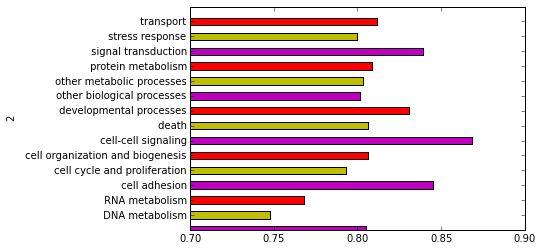

In [45]:
Piura.groupby(2)[1].mean().plot(kind='barh', color=list('myr'))
plt.axis([0.7, 0.9, 0, 15])

ImportError: dlopen(/Applications/Pineapple-Pro.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/special/_ufuncs.cpython-35m-darwin.so, 2): Library not loaded: /usr/local/lib/gcc/5/libgfortran.3.dylib
  Referenced from: /Applications/Pineapple-Pro.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/special/_ufuncs.cpython-35m-darwin.so
  Reason: image not found

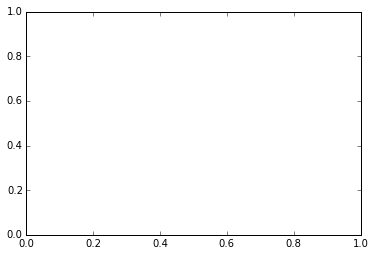